# Callbacks

### 'callbacks' kwarg of model's .fit() method allow to tune learning rate during training

In [1]:
import tensorflow as tf
dataset = tf.data.Dataset.range(100)
dataset = dataset.window(20, shift=1, drop_remainder=True)
dataset_flat = dataset.flat_map(lambda window: window.batch(5))
dataset_flat = dataset_flat.map(lambda window: (window[:-1], window[-1:]))

dataset = dataset_flat

window_size = 20

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss="mse", optimizer=optimizer)

history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=0)

[1e-08, 0.001, 0, 10]

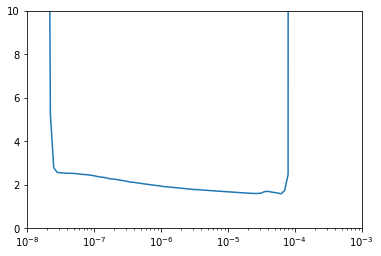

In [2]:
import matplotlib.pyplot as plt
import numpy as np

lrs = 1e-8 * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 10])

As a result here we may choose learning rate to be ~2e-5 (where it's close to minimum and still stable)